In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('fetalhealth.csv')

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [6]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
df['fetal_health'].unique()

array([2., 1., 3.])

In [8]:
df['fetal_health'] = df['fetal_health'].astype(int)
fetal_health = {
    1:'normal',
    2:'suspect',
    3:'pathological'
}
df.fetal_health = df.fetal_health.map(fetal_health)

In [9]:
df['fetal_health'].unique()

array(['suspect', 'normal', 'pathological'], dtype=object)

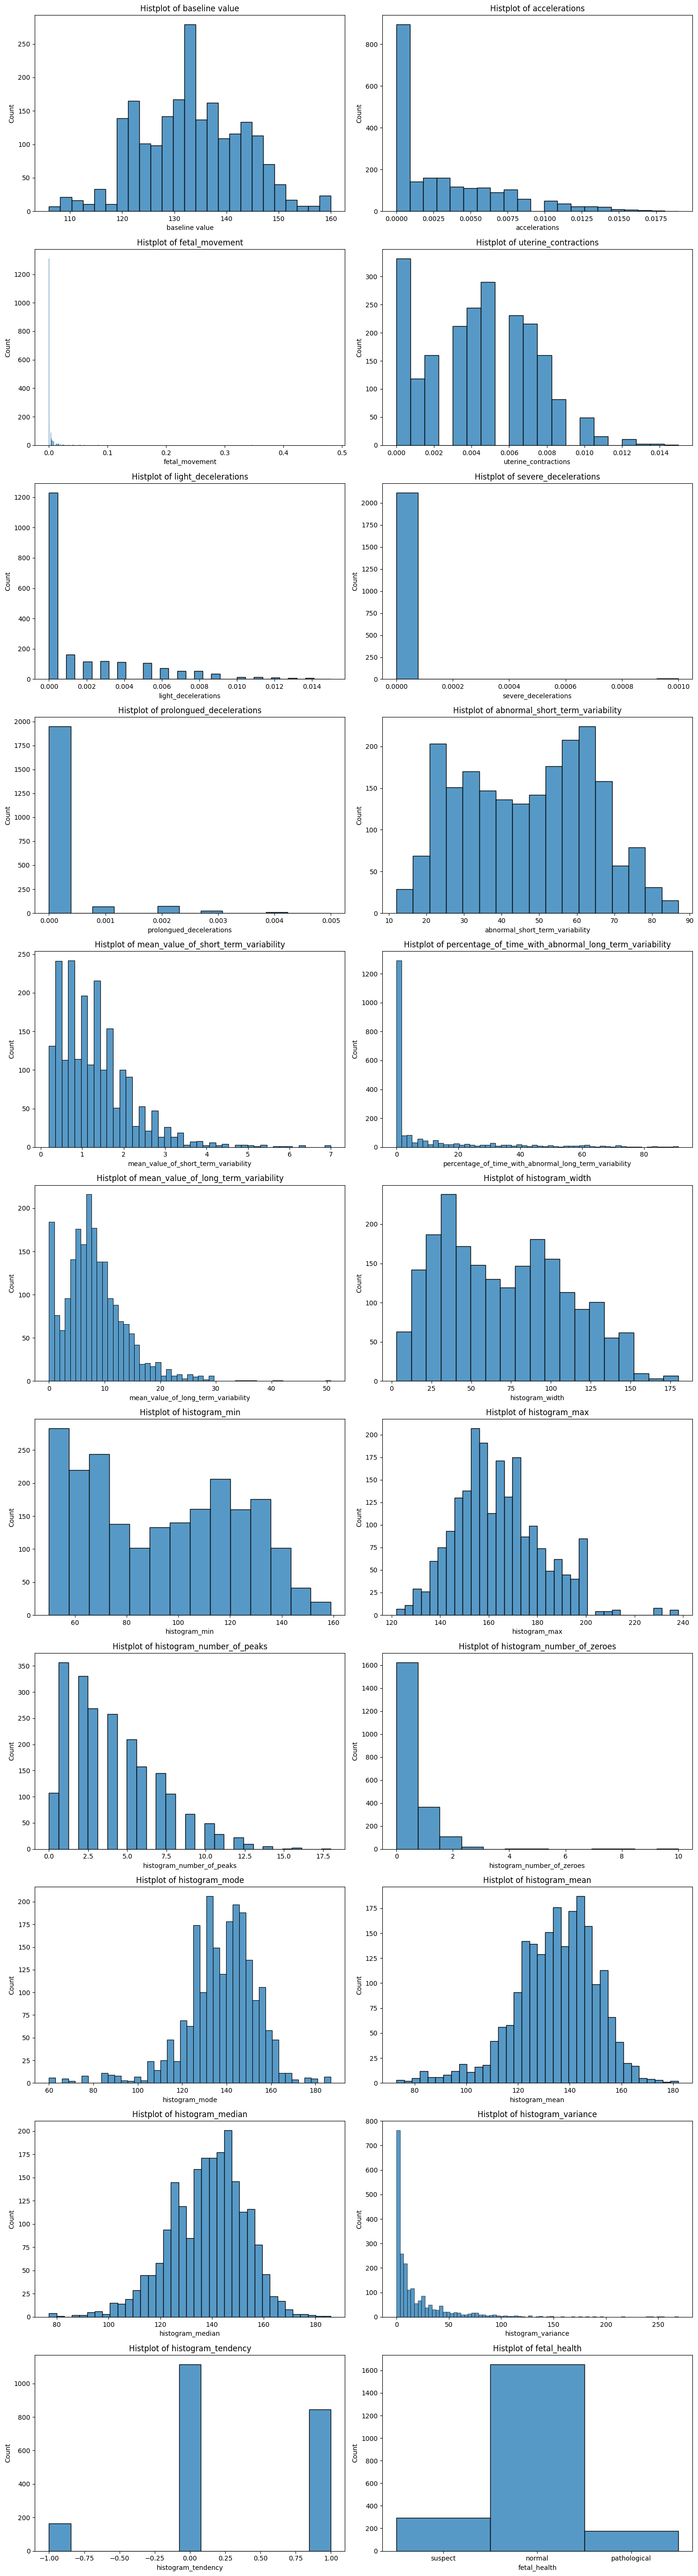

In [10]:
num_cols = len(df.columns)  # Get the number of columns
cols_per_row = 2  # Define how many plots per row
num_rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calculate number of rows needed

# Set up the matplotlib figure
plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size based on the number of rows

# Loop through the columns and create a subplot for each
for i, col in enumerate(df.columns, 1):
    plt.subplot(num_rows, cols_per_row, i)  # Create a subplot for each column
    sns.histplot(data=df, x=col)
    plt.title(f'Histplot of {col}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

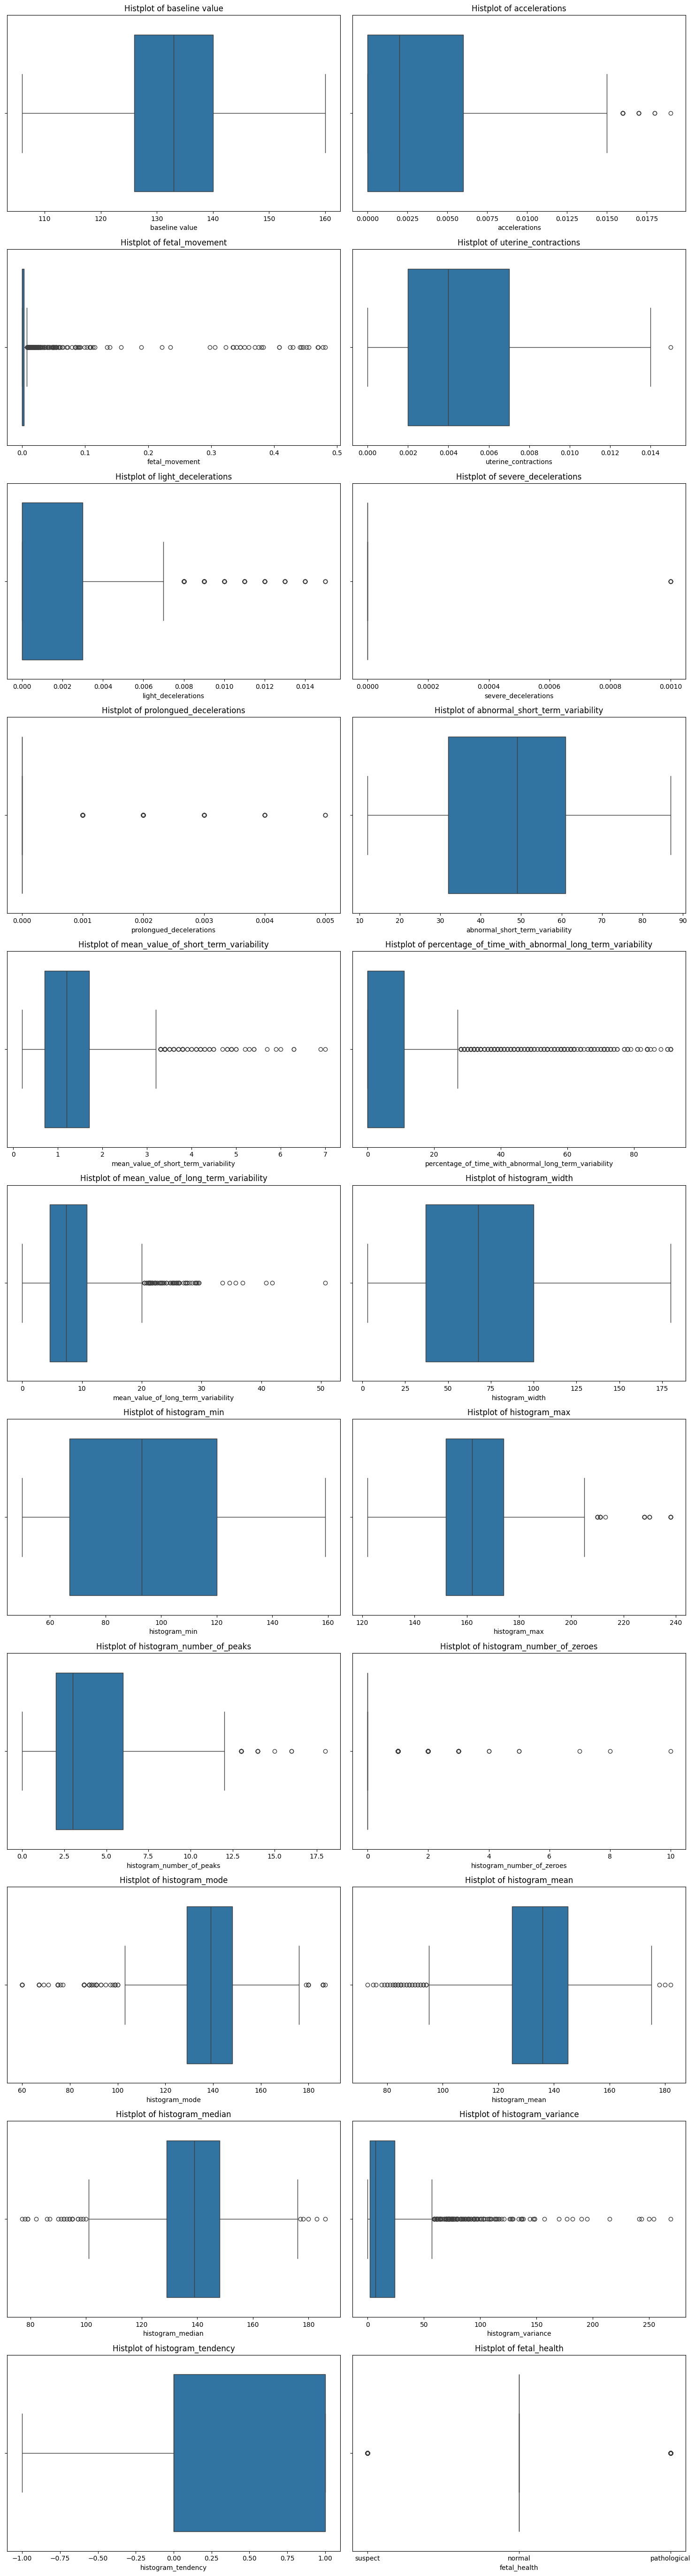

In [11]:
num_cols = len(df.columns)  # Get the number of columns
cols_per_row = 2  # Define how many plots per row
num_rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calculate number of rows needed

# Set up the matplotlib figure
plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size based on the number of rows

# Loop through the columns and create a subplot for each
for i, col in enumerate(df.columns, 1):
    plt.subplot(num_rows, cols_per_row, i)  # Create a subplot for each column
    sns.boxplot(data=df, x=col)
    plt.title(f'Histplot of {col}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [12]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [13]:
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=0) 
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=0) 

df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train['fetal_health'].values
y_test = df_test['fetal_health'].values
y_val = df_val['fetal_health'].values

x_train = df_train.drop(columns=['fetal_health'])
x_test = df_test.drop(columns=['fetal_health'])
x_val = df_val.drop(columns=['fetal_health'])

features = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

train_dicts = df_train[features].to_dict(orient='records')
val_dicts = df_val[features].to_dict(orient='records')

dv = DictVectorizer(sparse=True)
x_train = dv.fit_transform(train_dicts)
x_val = dv.transform(val_dicts)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

# Defining models and parameters
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=0),
        'params': {
            'n_estimators': [1, 3, 5, 7, 9, 10],
            'max_depth': [1, 3, 5, 7, 9, 10]
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(random_state=0),
        'params': {
            'max_depth': [1, 3, 5, 7, 9, 10]  # Removed n_estimators
        }
    },
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(random_state=0),
        'params': {
            'n_estimators': [1, 3, 5, 7, 9, 10],
            'learning_rate': [0.1, 0.01]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=0),
        'params': {
            'max_depth': [1, 3, 5, 7, 9, 10],
            'n_estimators': [1, 3, 5, 7, 9, 10]
        }
    }
}

# Results collection
results = []
for model_name, model_params in models.items():
    grid_search = GridSearchCV(model_params['model'], model_params['params'],
                               scoring='accuracy',  # Changed to accuracy for classification
                               cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(x_train, y_train)

    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_  # Use best_score_ for accuracy
    results.append({
        'Model': model_name,
        'Best Accuracy': best_accuracy,
        'Best Params': best_params
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


D:\downloads\my_anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fitting 5 folds for each of 36 candidates, totalling 180 fits
                    Model  Best Accuracy  \
0            RandomForest       0.933333   
1  DecisionTreeClassifier       0.925490   
2      AdaBoostClassifier       0.829020   
3        GradientBoosting       0.936471   

                                  Best Params  
0        {'max_depth': 9, 'n_estimators': 10}  
1                            {'max_depth': 7}  
2  {'learning_rate': 0.1, 'n_estimators': 10}  
3        {'max_depth': 5, 'n_estimators': 10}  


In [14]:
results_df.sort_values(by='Best Accuracy',ascending=False
                    )

,Model,Best Accuracy,Best Params
3,GradientBoosting,0.936471,"{'max_depth': 5, 'n_estimators': 10}"
0,RandomForest,0.933333,"{'max_depth': 9, 'n_estimators': 10}"
1,DecisionTreeClassifier,0.925490,{'max_depth': 7}
2,AdaBoostClassifier,0.829020,"{'learning_rate': 0.1, 'n_estimators': 10}"


from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [1, 3, 5, 7, 9, 10, 20, 50, 100],
    'n_estimators': range(10, 201, 10),
    'min_samples_split': range(10, 201, 10),
    'min_samples_leaf': range(10, 201, 10)
}

gbm = GradientBoostingClassifier(learning_rate=0.1, random_state=0)

grid_search = GridSearchCV(gbm, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid

In [15]:
param_dist = {
    'max_depth': [1, 3, 5, 7, 9, 10, 20, 50, 100],
    'n_estimators': range(10, 201, 10),
    'min_samples_split': range(10, 201, 10),
    'min_samples_leaf': range(10, 201, 10)
}

gbm = GradientBoostingClassifier(learning_rate=0.1, random_state=0)

random_search = RandomizedSearchCV(gbm, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
random_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [16]:
best_params, best_score

({'n_estimators': 190,
  'min_samples_split': 190,
  'min_samples_leaf': 30,
  'max_depth': 5},
 0.9458823529411765)

In [22]:
best_params = {'n_estimators': 190,
  'min_samples_split': 190,
  'min_samples_leaf': 30,
  'max_depth': 5}

gbm = GradientBoostingClassifier(**best_params,learning_rate=0.1,random_state=0) 
gbm.fit(x_train,y_train)
y_pred = gbm.predict(x_val)
accuracy = accuracy_score(y_val,y_pred)
rmse = np.sqrt(mean_squared_error(y_val,y_pred))
print(f"Test Accuracy: {accuracy}")
print(f"Test RMSE: {rmse}")

label_mapping = {0: "Normal", 1: "Suspect", 2: "Pathological"}

# Convert numerical predictions to categorical labels
categorical_labels = np.vectorize(label_mapping.get)(y_pred)

# Print the categorical labels
print("Predicted Categorical Labels:", categorical_labels)

Test Accuracy: 0.9435294117647058
Test RMSE: 0.42008402520840293
Predicted Categorical Labels: ['Normal' 'Pathological' 'Pathological' 'Normal' 'Normal' 'Normal'
 'Suspect' 'Normal' 'Suspect' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Suspect'
 'Normal' 'Normal' 'Normal' 'Normal' 'Suspect' 'Normal' 'Normal' 'Suspect'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Pathological' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Pathological' 'Normal'
 'Normal' 'Suspect' 'Normal' 'Normal' 'Normal' 'Pathological' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Suspect' 'Normal'
 'Pathological' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Pathological' 'Normal' 'Normal' 'Pathological' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Suspect' 'Normal'

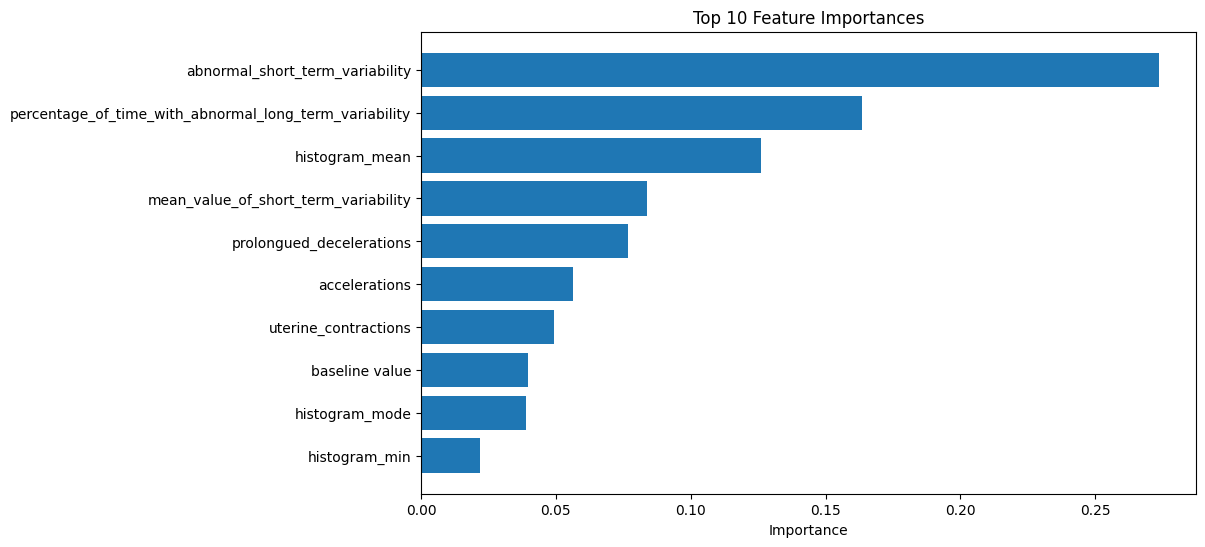

In [23]:
feature_importances = gbm.feature_importances_
feature_names = dv.get_feature_names_out()  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [19]:
train_dicts[0]

{'baseline value': 125.0,
 'accelerations': 0.008,
 'fetal_movement': 0.007,
 'uterine_contractions': 0.007,
 'light_decelerations': 0.005,
 'severe_decelerations': 0.0,
 'prolongued_decelerations': 0.0,
 'abnormal_short_term_variability': 23.0,
 'mean_value_of_short_term_variability': 2.1,
 'percentage_of_time_with_abnormal_long_term_variability': 0.0,
 'mean_value_of_long_term_variability': 5.5,
 'histogram_width': 125.0,
 'histogram_min': 53.0,
 'histogram_max': 178.0,
 'histogram_number_of_peaks': 8.0,
 'histogram_number_of_zeroes': 0.0,
 'histogram_mode': 143.0,
 'histogram_mean': 128.0,
 'histogram_median': 137.0,
 'histogram_variance': 65.0,
 'histogram_tendency': 1.0}

In [24]:
fetal_data = {
    'baseline value': 120.0,
    'accelerations': 0.0,
    'fetal_movement': 0.0,
    'uterine_contractions': 0.0,
    'light_decelerations': 0.0,
    'severe_decelerations': 0.0,
    'prolongued_decelerations': 0.0,
    'abnormal_short_term_variability': 73.0,
    'mean_value_of_short_term_variability': 0.5,
    'percentage_of_time_with_abnormal_long_term_variability': 43.0,
    'mean_value_of_long_term_variability': 2.4,
    'histogram_width': 125.0,
    'histogram_min': 53.0,
    'histogram_max': 178.0,
    'histogram_number_of_peaks': 8.0,
    'histogram_number_of_zeroes': 0.0,
    'histogram_mode': 143.0,
    'histogram_mean': 128.0,
    'histogram_median': 137.0,
    'histogram_variance': 65.0,
    'histogram_tendency': 1.0
}


input_dicts = [fetal_data]
input_vectorized = dv.transform(input_dicts)

y_pred = gbm.predict(input_vectorized)

# Define the mapping for numerical predictions to categorical labels
label_mapping = {1: "Normal", 2: "Suspect", 3: "Pathological"}

# Convert numerical prediction to categorical label
predicted_label = label_mapping[y_pred[0]]

# Print the predicted label
print(f"Predicted Fetal Health: {predicted_label}")

Predicted Fetal Health: Suspect
